In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc_curve
from scikitplot.decomposition import plot_pca_component_variance
from scikitplot.estimators import plot_feature_importances
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
all_data = pd.concat([train_data, test_data])
print (train_data.head(5))
print (train_data.columns)
print (train_data.isnull().sum())
print (train_data.shape)
print (test_data.shape)

  transaction_id     num_var_1  num_var_2  num_var_3     num_var_4  \
0          id_11  2.302632e-08   0.040182        0.0  1.800000e-07   
1          id_33  7.965789e-06   0.157872        0.0  2.105000e-06   
2          id_51  7.828947e-08   0.089140        0.0  3.550000e-07   
3          id_54  7.894737e-08   0.227239        0.0  1.050000e-06   
4          id_62  3.321053e-06   0.160410        0.0  2.105000e-06   

      num_var_5     num_var_6     num_var_7 cat_var_1 cat_var_2  ...    \
0  2.302632e-08  2.368421e-08  1.115205e-08       NaN        ce  ...     
1  2.769737e-07  7.965789e-06  2.433058e-06        da        tn  ...     
2  4.671053e-08  1.052632e-07  4.276014e-07        gf        ce  ...     
3  1.381579e-07  2.190789e-07  1.848054e-08       NaN        ce  ...     
4  2.769737e-07  3.340789e-06  2.152983e-06        da        tn  ...     

  cat_var_34 cat_var_35 cat_var_36 cat_var_37 cat_var_38 cat_var_39  \
0          0          0          0          0          0       

In [3]:
drop_features = ['cat_var_1', 'cat_var_3', 'cat_var_8', 'target']
all_X = all_data.drop(drop_features, axis=1)
all_Y = all_data['target']
print (all_X.shape)
print (all_Y.shape)

(872444, 47)
(872444,)


In [4]:
print(all_X.dtypes)
le = LabelEncoder()
transform = ['transaction_id', 'cat_var_2', 'cat_var_4','cat_var_5','cat_var_6','cat_var_7', 'cat_var_9','cat_var_10',\
             'cat_var_11','cat_var_12','cat_var_13','cat_var_14','cat_var_15','cat_var_16','cat_var_17','cat_var_18']
for c in transform:
    all_X[c] = le.fit_transform(all_X[c])
all_X.head(1)

cat_var_10         object
cat_var_11         object
cat_var_12         object
cat_var_13         object
cat_var_14         object
cat_var_15         object
cat_var_16         object
cat_var_17         object
cat_var_18         object
cat_var_19          int64
cat_var_2          object
cat_var_20          int64
cat_var_21          int64
cat_var_22          int64
cat_var_23          int64
cat_var_24          int64
cat_var_25          int64
cat_var_26          int64
cat_var_27          int64
cat_var_28          int64
cat_var_29          int64
cat_var_30          int64
cat_var_31          int64
cat_var_32          int64
cat_var_33          int64
cat_var_34          int64
cat_var_35          int64
cat_var_36          int64
cat_var_37          int64
cat_var_38          int64
cat_var_39          int64
cat_var_4          object
cat_var_40          int64
cat_var_41          int64
cat_var_42          int64
cat_var_5          object
cat_var_6          object
cat_var_7          object
cat_var_9   

/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,cat_var_19,...,cat_var_7,cat_var_9,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,transaction_id
0,3,3,1,19,1,0,1,1,0,0,...,4,4,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,11112


In [5]:
train_X = all_X[:348978]
train_Y = all_Y[:348978]
test_X = all_X[348978:]
print ('Training', train_X.shape, train_Y.shape)
print ('Testing', test_X.shape)

('Training', (348978, 47), (348978,))
('Testing', (523466, 47))


0.0    311610
1.0     37368
Name: target, dtype: int64


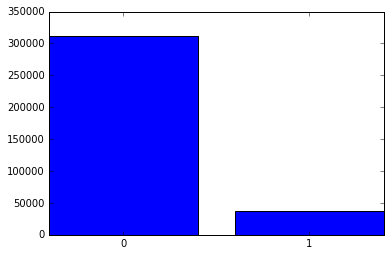

In [6]:
print (train_Y.value_counts())
plt.bar(np.arange(2), (train_Y.value_counts()[0], train_Y.value_counts()[1]), align='center')
plt.xticks(np.arange(2), (0, 1))
plt.show()

In [7]:
No_of_frauds= len(train_data[train_data["target"]==1])
No_of_normals = len(train_data[train_data["target"]==0])
print("The number of fraudulent transactions( Class 1) are: ", No_of_frauds)
print("The number of normal transactions( Class 0) are: ", No_of_normals)
total= No_of_frauds + No_of_normals
Fraud_percent= (float(No_of_frauds) / total)*100
Normal_percent= (float(No_of_normals) / total)*100
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

('The number of fraudulent transactions( Class 1) are: ', 37368)
('The number of normal transactions( Class 0) are: ', 311610)
('Class 0 percentage = ', 89.29216168354452)
('Class 1 percentage = ', 10.70783831645548)


In [8]:
#list of fraud indices
fraud_index= np.array(train_data[train_data["target"]==1].index)

#getting the list of normal indices from the full dataset
normal_index= train_data[train_data["target"]==0].index

#choosing random normal indices equal to the number of fraudulent transactions
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
random_normal_indices= np.array(random_normal_indices)

# concatenate fraud index and normal index to create a list of indices
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])

#use the undersampled indices to build the undersampled_data dataframe
undersampled_data= train_data.iloc[undersampled_indices, :]

print(undersampled_data.head())

   transaction_id     num_var_1  num_var_2  num_var_3     num_var_4  \
11         id_119  2.296053e-07   0.089563        0.0  3.550000e-07   
18         id_173  3.947368e-09   0.083113        0.0  3.550000e-07   
28         id_259  4.167763e-06   0.159776        0.0  2.105000e-06   
29         id_264  3.598684e-07   0.089140        0.0  3.550000e-07   
30         id_266  4.013158e-07   0.578936        0.0  8.930000e-06   

       num_var_5     num_var_6     num_var_7 cat_var_1 cat_var_2  ...    \
11  4.671053e-08  4.407895e-08  4.610576e-07        gf        ce  ...     
18  4.671053e-08  4.407895e-08  1.911780e-09        gf        ce  ...     
28  2.769737e-07  4.173684e-06  2.922793e-06        da        tn  ...     
29  4.671053e-08  4.407895e-08  1.742906e-07        gf        ce  ...     
30  1.129605e-06  4.013158e-07  1.943643e-07        mg        ce  ...     

   cat_var_34 cat_var_35 cat_var_36 cat_var_37 cat_var_38 cat_var_39  \
11          0          0          0          0    

('The number of fraudulent transactions( Class 1) are: ', 37368)
('The number of normal transactions( Class 0) are: ', 37368)
('The total number of rows of both classes are: ', 74736)
('Class 0 percentage = ', 50.0)
('Class 1 percentage = ', 50.0)


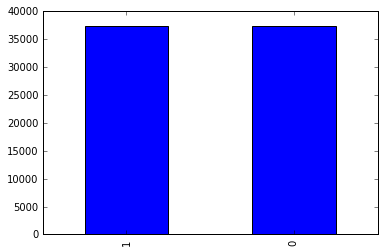

In [9]:
No_of_frauds_sampled= len(undersampled_data[undersampled_data["target"]== 1])

No_of_normals_sampled = len(undersampled_data[undersampled_data["target"]== 0])

print("The number of fraudulent transactions( Class 1) are: ", No_of_frauds_sampled)
print("The number of normal transactions( Class 0) are: ", No_of_normals_sampled)
total_sampled= No_of_frauds_sampled + No_of_normals_sampled
print("The total number of rows of both classes are: ", total_sampled)

Fraud_percent_sampled= (float(No_of_frauds_sampled) / total_sampled)*100
Normal_percent_sampled= (float(No_of_normals_sampled) / total_sampled)*100
print("Class 0 percentage = ", Normal_percent_sampled)
print("Class 1 percentage = ", Fraud_percent_sampled)

#Check the data count now
count_sampled=pd.value_counts(undersampled_data["target"], sort= True)
count_sampled.plot(kind= 'bar')

In [10]:
drop_features = ['cat_var_1', 'cat_var_3', 'cat_var_8']
undersampled_data = undersampled_data.drop(drop_features, axis=1)
print (undersampled_data.shape)

(74736, 48)


In [11]:
le = LabelEncoder()
transform = ['transaction_id', 'cat_var_2', 'cat_var_4','cat_var_5','cat_var_6','cat_var_7', 'cat_var_9','cat_var_10',\
             'cat_var_11','cat_var_12','cat_var_13','cat_var_14','cat_var_15','cat_var_16','cat_var_17','cat_var_18']
for c in transform:
    undersampled_data[c] = le.fit_transform(undersampled_data[c])
undersampled_data.head(1)

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_2,cat_var_4,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
11,1801,2.296053e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,4.610576e-07,3,1,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# sc = StandardScaler()
# sscale = ['cat_var_2', 'cat_var_4','cat_var_5','cat_var_6','cat_var_7', 'cat_var_9','cat_var_10','cat_var_11',\
#           'cat_var_12','cat_var_13','cat_var_14','cat_var_15','cat_var_16','cat_var_17','cat_var_18']
# for c in sscale:
#     undersampled_data[c] = sc.fit_transform(undersampled_data[c])
# undersampled_data.head(1)

In [6]:
X= undersampled_data.iloc[:, undersampled_data.columns != "target"].values
y= undersampled_data.iloc[:, undersampled_data.columns == "target"].values
print ('Traning', X.shape, y.shape)

NameError: name 'undersampled_data' is not defined

In [6]:
train_x, val_x, train_y, val_y = train_test_split(train_X, train_Y, test_size=0.25, random_state=7)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def selectKImportance(model, X, k=5):
     return X[:,model.feature_importances_.argsort()[::-1][:k]]
    

In [98]:
def printing_Kfold_scores(train_x, train_y):
    fold = KFold(len(train_y),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(train_x, train_y.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(val_x)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(val_y.ravel(), y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

best_c = printing_Kfold_scores(train_x, train_y)

-------------------------------------------
('C parameter: ', 0.01)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.18160676532769557)
('Iteration ', 2, ': recall score = ', 0.18118393234672303)
('Iteration ', 3, ': recall score = ', 0.18139534883720931)
('Iteration ', 4, ': recall score = ', 0.18150105708245243)
('Iteration ', 5, ': recall score = ', 0.18150105708245243)

('Mean recall score ', 0.18143763213530656)

-------------------------------------------
('C parameter: ', 0.1)
-------------------------------------------



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Iteration ', 1, ': recall score = ', 0.18509513742071881)
('Iteration ', 2, ': recall score = ', 0.1839323467230444)
('Iteration ', 3, ': recall score = ', 0.18520084566596196)
('Iteration ', 4, ': recall score = ', 0.18424947145877379)
('Iteration ', 5, ': recall score = ', 0.1846723044397463)

('Mean recall score ', 0.18463002114164903)

-------------------------------------------
('C parameter: ', 1)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.18509513742071881)
('Iteration ', 2, ': recall score = ', 0.18530655391120507)
('Iteration ', 3, ': recall score = ', 0.18520084566596196)
('Iteration ', 4, ': recall score = ', 0.18520084566596196)
('Iteration ', 5, ': recall score = ', 0.18520084566596196)

('Mean recall score ', 0.18520084566596196)

-------------------------------------------
('C parameter: ', 10)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.18583509513742072)
('Iteration ', 2, ': recall s

('Recall metric in the testing dataset: ', 0.18604651162790697)
Confusion matrix, without normalization
[[77462   323]
 [ 7700  1760]]


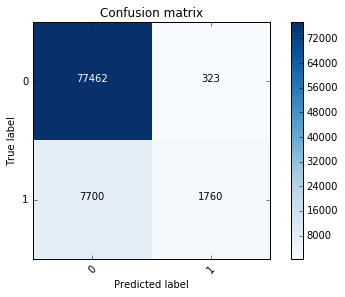

('Score:', 0.59094702003584709)


In [102]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(train_x, train_y.ravel())
y_pred_undersample = lr.predict(val_x)

# Compute confusion matrix
cnf_matrix = confusion_matrix(val_y, y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print ('Score:', roc_auc_score(val_y, y_pred_undersample))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
((87245,), (87245, 2), (87245, 47), (87245,))
Confusion matrix, without normalization
[[77662   123]
 [ 5897  3563]]


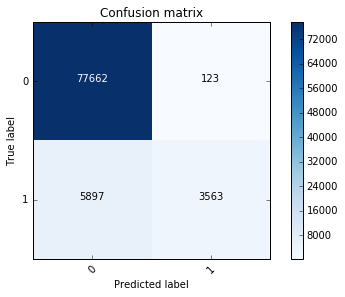

AUC-ROC:


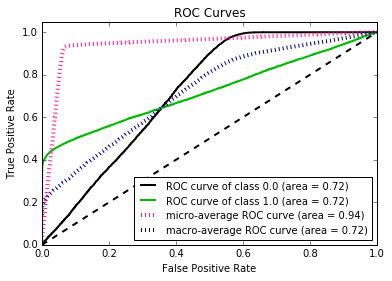

('Score:', 0.68752859803157207)


KeyboardInterrupt: 

In [9]:
model = xgb.XGBClassifier()
model.fit(train_x, train_y.ravel())

# # Fit model using each importance as a threshold
# thresholds = np.sort(model.feature_importances_)
# thresholds = thresholds[::-1]
# print (thresholds, len(thresholds))
# for thresh in thresholds:
#     # select features using threshold
#     selection = SelectFromModel(model, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(train_x)
#     # train model
#     selection_model = xgb.XGBClassifier()
#     selection_model.fit(select_X_train, train_y)
#     # eval model
#     select_X_test = selection.transform(val_x)
#     y_pred = selection_model.predict(select_X_test)
#     predictions = [round(value) for value in y_pred]
#     roc_score =roc_auc_score(val_y, predictions)
#     print("Thresh=%.3f, n=%d, Roc: %.2f" % (thresh, select_X_train.shape[1], roc_score))

# new_x = selectKImportance(model, train_x, k=20)
# new_val_x = selectKImportance(model, val_x, k=20)
model = xgb.XGBClassifier(max_depth=7, n_estimators=500)
print (model.fit(train_x, train_y.ravel()))
# plot_feature_importances(model, max_num_features=20, x_tick_rotation=-90, feature_names=undersampled_data.columns)
# plt.show()
pred_class_y = model.predict(val_x)
pred_val_y = model.predict_proba(val_x)
print (pred_class_y.shape, pred_val_y.shape, val_x.shape, val_y.shape)
cm = confusion_matrix(val_y, pred_class_y)
plot_confusion_matrix(cm, [0, 1])
plt.show()
print ('AUC-ROC:')
plot_roc_curve(val_y, pred_val_y)
plt.show()
print ('Score:', roc_auc_score(val_y, pred_class_y))

#Applying 10 fold cross validation
# rc_score = cross_val_score(estimator = model, X=train_x, y = train_y.ravel(), cv = 10, scoring='roc_auc')
# print("The rc score accuracy in %: ", rc_score.mean())

((87245,), (87245, 2), (87245, 47), (87245,))
Confusion matrix, without normalization
[[77054   731]
 [ 5991  3469]]


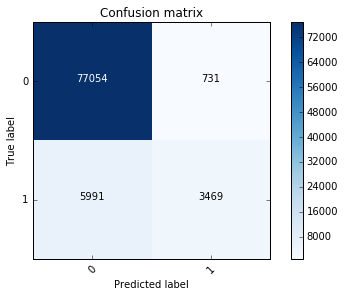

AUC-ROC:


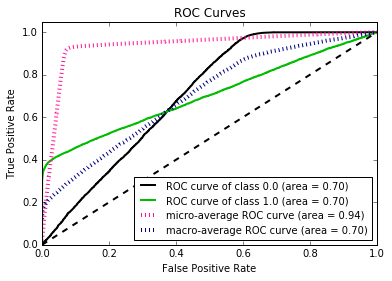

('Score:', 0.67865210198165082)


In [22]:
clf = RandomForestClassifier(n_estimators=500, class_weight='balanced')
print (clf.fit(train_x, train_y.ravel()))
# plot_feature_importances(clf, max_num_features=47, x_tick_rotation=-90, feature_names=undersampled_data.columns)
# plt.show()
# new_x = selectKImportance(clf, train_x, k=20)
# new_val_x = selectKImportance(clf, val_x, k=20)

# plot_feature_importances(clf, max_num_features=47, x_tick_rotation=-90, feature_names=undersampled_data.columns)
# plt.show()
# importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]
# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
clf.fit(train_x, train_y.ravel())
pred_class_y = clf.predict(val_x)
pred_val_y = clf.predict_proba(val_x)
print (pred_class_y.shape, pred_val_y.shape, val_x.shape, val_y.shape)
cm = confusion_matrix(val_y, pred_class_y)
plot_confusion_matrix(cm, [0, 1])
plt.show()
print ('AUC-ROC:')
plot_roc_curve(val_y, pred_val_y)
plt.show()
print ('Score:', roc_auc_score(val_y, pred_class_y))

#Applying 10 fold cross validation
# rc_score = cross_val_score(estimator = clf, X=train_x, y = train_y.ravel(), cv = 10, scoring='roc_auc')
# print("The rc score accuracy in %: ", rc_score)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
((87245,), (87245, 2), (87245, 47), (87245,))
Confusion matrix, without normalization
[[76032  1753]
 [ 6170  3290]]


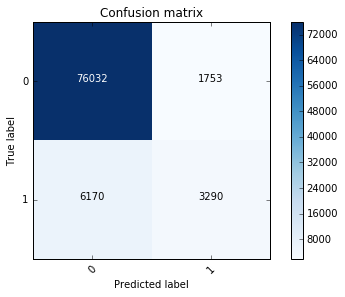

AUC-ROC:


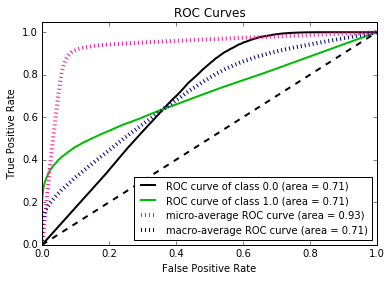

('Score:', 0.66262182404717507)


In [24]:
clf = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
print (clf.fit(train_x, train_y.ravel()))
# plot_feature_importances(clf, max_num_features=47, x_tick_rotation=-90, feature_names=undersampled_data.columns)
# plt.show()

clf.fit(train_x, train_y.ravel())
pred_class_y = clf.predict(val_x)
pred_val_y = clf.predict_proba(val_x)
print (pred_class_y.shape, pred_val_y.shape, val_x.shape, val_y.shape)
cm = confusion_matrix(val_y, pred_class_y)
plot_confusion_matrix(cm, [0, 1])
plt.show()
print ('AUC-ROC:')
plot_roc_curve(val_y, pred_val_y)
plt.show()
print ('Score:', roc_auc_score(val_y, pred_class_y))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
((87245,), (87245, 2), (87245, 47), (87245,))
Confusion matrix, without normalization
[[76773  1012]
 [ 5944  3516]]


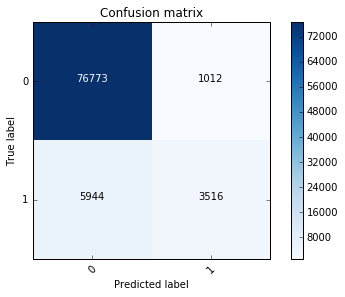

AUC-ROC:


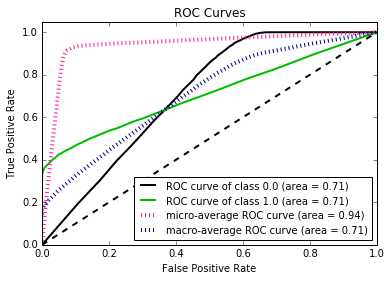

('Score:', 0.67932998489765717)


In [25]:
clf = BaggingClassifier(n_estimators=100)
print (clf.fit(train_x, train_y.ravel()))
pred_class_y = clf.predict(val_x)
pred_val_y = clf.predict_proba(val_x)
print (pred_class_y.shape, pred_val_y.shape, val_x.shape, val_y.shape)
cm = confusion_matrix(val_y, pred_class_y)
plot_confusion_matrix(cm, [0, 1])
plt.show()
print ('AUC-ROC:')
plot_roc_curve(val_y, pred_val_y)
plt.show()
print ('Score:', roc_auc_score(val_y, pred_class_y))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=150, random_state=None)
((87245,), (87245, 2), (87245, 47), (87245,))
Confusion matrix, without normalization
[[77659   126]
 [ 7781  1679]]


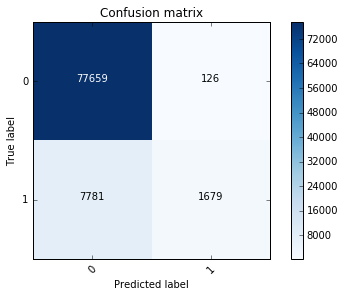

AUC-ROC:


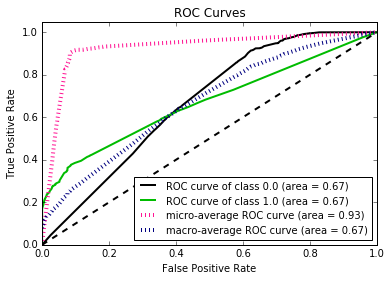

('Score:', 0.58793214708890895)


In [17]:
clf = AdaBoostClassifier()
print (clf.fit(train_x, train_y.ravel()))
pred_class_y = clf.predict(val_x)
pred_val_y = clf.predict_proba(val_x)
print (pred_class_y.shape, pred_val_y.shape, val_x.shape, val_y.shape)
cm = confusion_matrix(val_y, pred_class_y)
plot_confusion_matrix(cm, [0, 1])
plt.show()
print ('AUC-ROC:')
plot_roc_curve(val_y, pred_val_y)
plt.show()
print ('Score:', roc_auc_score(val_y, pred_class_y))

#Applying 10 fold cross validation
# rc_score = cross_val_score(estimator = clf, X=train_x, y = train_y.ravel(), cv = 10, scoring='roc_auc')
# print("The rc score accuracy in %: ", rc_score)

In [ ]:
# clf= SVC(C= 1, kernel= 'rbf', random_state= 0)
# clf.fit(train_x, train_y.ravel())
# y_pred = classifier.predict(val_x)
# pred_class_y = clf.predict(val_x)
# pred_val_y = clf.predict_proba(val_x)
# print (pred_class_y.shape, pred_val_y.shape, val_x.shape, val_y.shape)
# cm = confusion_matrix(val_y, pred_class_y)
# plot_confusion_matrix(cm, [0, 1])
# plt.show()
# print ('AUC-ROC:')
# plot_roc_curve(val_y, pred_val_y)
# plt.show()
# print ('Score:', roc_auc_score(val_y, pred_class_y))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from mlxtend.classifier import StackingClassifier

# clf1 = ExtraTreesClassifier(random_state = 45, n_estimators = 100)
clf2 = RandomForestClassifier(random_state = 45, n_estimators = 500)
clf3 = xgb.XGBClassifier(seed = 45, learning_rate = 0.1, n_estimators = 500, max_depth = 5)
clf4 = BaggingClassifier(n_estimators = 100)
# print ('ExtraTree:', cv_model(clf1))
# print ('RF:', cv_model(clf2))
# print ('XGB:', cv_model(clf3))
# print ('BaggingTree:', cv_model(clf4))
# Compute stacking features
model =  StackingClassifier(classifiers=[clf2, clf4], meta_classifier=clf3, verbose=1)
# print ('Stack:', cv_model(model))
model.fit(train_x, train_y)

# # Final prediction score
# print('Final r2 score: [%.8f]' % model.score(val_x, val_y))
# pred_test_y = model.predict(test_x)

pred_class_y = model.predict(val_x)
pred_val_y = model.predict_proba(val_x)
print (pred_class_y.shape, pred_val_y.shape, val_x.shape, val_y.shape)
cm = confusion_matrix(val_y, pred_class_y)
plot_confusion_matrix(cm, [0, 1])
plt.show()
print ('AUC-ROC:')
plot_roc_curve(val_y, pred_val_y)
plt.show()
print ('Score:', roc_auc_score(val_y, pred_class_y))

Fitting 2 classifiers...
Fitting classifier1: randomforestclassifier (1/2)


In [ ]:
test_pred = model.predict_proba(test_X)
sub = pd.DataFrame({'transaction_id':test_data['transaction_id'], 'target':test_pred[:, 1]})
sub.to_csv('submit.csv', columns=['transaction_id', 'target'], index=False)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD

def base_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='elu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
#     model.add(Dense(128, activation='elu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(32, activation='elu'))
#     model.add(Dropout(0.25))
    model.add(Dense(8, activation='elu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
    return model

model = base_model()
# train_X = new_x.as_matrix().astype('float32')
# train_Y = train_y.as_matrix().astype('float32')
# val_X = new_val_x.as_matrix().astype('float32')
# val_Y = val_y.as_matrix().astype('float32')
# one_hot_labels = keras.utils.to_categorical(train_Y, num_classes=2)
model.fit(new_x, train_y.ravel(), batch_size=32, epochs=10)
pred_class_Y = model.predict(new_val_x)
pred_class_Y = np.reshape(pred_class_Y, (-1,))
pred_val_Y = model.predict_proba(new_val_x)
cm = confusion_matrix(val_y.ravel(), pred_class_Y)
plot_confusion_matrix(cm, [0, 1])
plt.show()
plot_roc_curve(val_Y, pred_val_Y)
plt.show()
print ('Score:', roc_auc_score(val_Y, pred_class_Y))

Using TensorFlow backend.


KeyboardInterrupt: 

In [25]:
print (pred_class_Y.shape)
print (new_val_x.shape)
print (val_y.shape)
print (pred_val_Y)
print (pred_class_Y)
print (val_y)
print (new_x.dtype, train_y.dtype, new_val_x.dtype, val_y.dtype)
print (pred_val_Y.dtype, pred_class_Y.dtype)
print (np.reshape(pred_class_Y, (-1,)).shape)


(18684,)
(18684, 20)
(18684, 1)
[[ 0.44568348]
 [ 0.47696379]
 [ 0.45814922]
 ..., 
 [ 0.47148901]
 [ 0.73599243]
 [ 0.4884066 ]]
[ 0.44568348  0.47696379  0.45814922 ...,  0.47148901  0.73599243
  0.4884066 ]
[[0]
 [0]
 [0]
 ..., 
 [1]
 [0]
 [1]]
(dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'))
(dtype('float32'), dtype('float32'))
(18684,)


In [68]:
print ('AUC-ROC:')
print (pred_val_Y)
#plot_roc_curve(val_y.ravel(), pred_val_Y.ravel())
#plt.show()
print ('Score:', roc_auc_score(val_y.ravel(), pred_val_Y))

AUC-ROC:
[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]
('Score:', 0.50467333263906944)


In [67]:
pred_val_Y[pred_val_Y > 0.5] = 1
pred_val_Y[pred_val_Y < 0.5] = 0
print (np.where(pred_val_Y >= 0.5, 1, 0))
print (pred_val_Y)

[[1]
 [1]
 [1]
 ..., 
 [1]
 [1]
 [1]]
[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]


In [33]:
select = ['cat_var_2', 'transaction_id','cat_var_4','cat_var_11','cat_var_15', 'cat_var_14','cat_var_6','cat_var_13',\
          'cat_var_7','cat_var_9','cat_var_12','cat_var_10','cat_var_5','num_var_5','num_var_7','num_var_4','num_var_1',\
         'num_var_2','num_var_3','num_var_6']
new_test_x = test_X[select]
print (new_test_x[:2], new_test_x.shape)

(   cat_var_2  transaction_id  cat_var_4  cat_var_11  cat_var_15  cat_var_14  \
0         50               0          1           0           1           1   
1          3          555555          0           1           0           2   

   cat_var_6  cat_var_13  cat_var_7  cat_var_9  cat_var_12  cat_var_10  \
0        149          14          4          3           3          13   
1        285          10          4          4           0           4   

   cat_var_5     num_var_5     num_var_7     num_var_4     num_var_1  \
0          0  2.769737e-07  1.300010e-07  2.105000e-06  4.736842e-07   
1          1  1.315789e-07  3.186300e-08  7.500000e-07  6.578947e-08   

   num_var_2  num_var_3     num_var_6  
0   0.162737        0.0  4.828947e-07  
1   0.086391        0.0  9.868421e-08  , (523466, 20))


In [34]:
new_test_x.rename(columns={'cat_var_2':'f2', 'transaction_id':'f1','cat_var_4':'f0','cat_var_11':'f6','cat_var_15':'f9',\
                           'cat_var_14':'f10','cat_var_6':'f11','cat_var_13':'f13','cat_var_7':'f15','cat_var_9':'f16',\
                           'cat_var_12':'f17','cat_var_10':'f18','cat_var_5':'f19','num_var_5':'f3','num_var_7':'f4',\
                           'num_var_4':'f5','num_var_1':'f7','num_var_2':'f8','num_var_3':'f12','num_var_6':'f14'}, \
                  inplace=True)

In [35]:
print (new_test_x.columns)

Index([u'f2', u'f1', u'f0', u'f6', u'f9', u'f10', u'f11', u'f13', u'f15',
       u'f16', u'f17', u'f18', u'f19', u'f3', u'f4', u'f5', u'f7', u'f8',
       u'f12', u'f14'],
      dtype='object')


In [37]:
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19']
new_test_x = new_test_x[cols]
print (new_test_x.columns)

Index([u'f0', u'f1', u'f2', u'f3', u'f4', u'f5', u'f6', u'f7', u'f8', u'f9',
       u'f10', u'f11', u'f12', u'f13', u'f14', u'f15', u'f16', u'f17', u'f18',
       u'f19'],
      dtype='object')
